## Final Project Submission

Please fill out:
* Student name: Lucas Wilkerson
* Student pace: Flex/part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# Home Price Analysis 

In [1]:
# Add Graphic 

## Project Overview 

For this project, I sought to explore how certain housing characteristics influence the price of a home in King county. Specifically, I use linear regression to show how specific housing characteristics impact the price of the home and create a model based on those variables to predict housing prices. 

## Business Problem and Stakeholder

A real estate company in King County wants to increase customer acquisition and retention by providing transparent and useful information regarding the sales prices of homes. Utilizing this data, they can assist customers/clients that are looking to sell their home understand what to expect to sell their current home for and what areas they could look into to increase the value of their home before selling. For the project specifically we will be exploring which housing characteristics are the most important and have the biggest impact on sales price.

## Data Understanding 

In [1]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing packages for statistics
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import sklearn.metrics as metrics
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import kstest

## Data Preparation

In [2]:
#Loading dataset
kc_df = pd.read_csv("data/kc_house_data.csv")
kc_df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

I have read in the file and previewed the head of the dataset along with utilizing .info() to get a general idea of the dataset. We have a total of over 30,000 (30,155) data entries with very low amounts of missing values. With low amounts of missing values, I plan to drop all rows with missing values. It looks like we have 25 columns that have types that include integers, floats, and objects. Looking at the columns and data types it seems we have several numerical values and catergorical values. I may need to transform some variables but that will be determined as I explore more into the data.

In [4]:
kc_house_df = kc_df.copy()

In [5]:
#Dropping all rows with null values and checking for duplicate values/rows
kc_house_df.dropna(inplace= True)

# Checking for duplicates using the id column
duplicates = kc_house_df[kc_house_df.duplicated(
subset = "id")]

#Duplicate row has been dropped
kc_house_df = kc_house_df.drop_duplicates()
kc_house_df.drop(["id"], axis = 1, inplace = True)

# Using .shape to check for number of rows and columns
print(kc_house_df.shape)

# Using .info() to check out columns, datatypes and to check for dropped values
print(kc_house_df.info())

(30110, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30110 non-null  object 
 1   price          30110 non-null  float64
 2   bedrooms       30110 non-null  int64  
 3   bathrooms      30110 non-null  float64
 4   sqft_living    30110 non-null  int64  
 5   sqft_lot       30110 non-null  int64  
 6   floors         30110 non-null  float64
 7   waterfront     30110 non-null  object 
 8   greenbelt      30110 non-null  object 
 9   nuisance       30110 non-null  object 
 10  view           30110 non-null  object 
 11  condition      30110 non-null  object 
 12  grade          30110 non-null  object 
 13  heat_source    30110 non-null  object 
 14  sewer_system   30110 non-null  object 
 15  sqft_above     30110 non-null  int64  
 16  sqft_basement  30110 non-null  int64  
 17  sqft_garage    30110 non-null  int64  

Duplicates and null values were dropped along with the id column as this column is not needed. Called .info() to confirm changes. We now have a total of 30,110 entries regarding home sales with 24 columns. 

In [6]:
#Inspecting value counts for all variables
for col in kc_house_df:
    print(kc_house_df[col].value_counts(), "\n")

7/1/2021      196
8/2/2021      186
7/6/2021      176
6/23/2021     176
6/16/2021     174
             ... 
12/26/2021      1
1/16/2022       1
12/5/2021       1
12/25/2021      1
6/9/2022        1
Name: date, Length: 365, dtype: int64 

650000.0     345
750000.0     306
800000.0     298
850000.0     296
600000.0     295
            ... 
903888.0       1
576200.0       1
1081500.0      1
2698000.0      1
720902.0       1
Name: price, Length: 5199, dtype: int64 

3     12745
4      9591
2      3925
5      2794
6       498
1       381
7        80
0        39
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 

2.5     8471
2.0     7343
1.0     4556
3.0     4116
3.5     2264
1.5     1807
4.0      644
4.5      531
5.0      145
5.5      102
6.0       45
0.0       25
6.5       25
7.5       12
7.0       12
0.5        5
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64 

1250    192
1400    190
1560    183
1900 

The dataset now contains 30110 rows with 25 columns and no missing values. Datatypes for the columns include integers, floats and objects. 

- Ten columns have their datatypes as objects while 15 are numeric.

- The grade column mixes two datatypes in which it has a numeric value(formatted as a string) and an object (as a string).

- Waterfront, greenbelt, nuisance, view, condition, heat_source, and sewer_system all have categorical data. We need to transform there to numeric data for future analysis.

- The view column has five different categories: NONE, AVERAGE, GOOD, EXCELLENT, FAIR. In this column, it seems 26,589 rows (88.2% of the dataset) are categorized as NONE. 

- Sqft_basement has 15,471 entries with a value of 0. This is roughly 51.3% of the dataset. It may be useful to change this variable to a categorical variable indicating if there is a basement or not (YES/NO). YES if the value is greater than 0 and NO if the value is 0. 

- Sqft_garage and sqft_patio are similar to to sqft_basement and could be simplified to a catergorical variable utilizing YES/NO. 

- Looking at the value_counts above we see that 39 houses have 0 bedrooms. We would expect every house to have at least 1 bedroom. With 39 being a very small percentage of the dataset we could drop these rows. 

- Looking at the value_counts above we see that 30 houses have less than 1 (either 0 or 0.5) bathrooms.  We would expect every house to have at least 1 full bathroom. With 30 being a very small percentage of the dataset we could drop these rows


In [9]:
# Dropping rows with bathrooms and bedrooms less than 1
#kc_house_df = kc_house_df[kc_house_df["bedrooms"] >= 1]
#kc_house_df = kc_house_df[kc_house_df["bathrooms"] >= 1]
#print(kc_house_df["bedrooms"].value_counts(), kc_house_df["bathrooms"].value_counts())

#print(kc_house_df.info())

3     12743
4      9588
2      3924
5      2794
6       498
1       378
7        80
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64 2.5     8471
2.0     7342
1.0     4541
3.0     4116
3.5     2264
1.5     1806
4.0      643
4.5      531
5.0      145
5.5      102
6.0       45
6.5       25
7.0       12
7.5       12
9.5        2
8.0        2
8.5        1
10.0       1
10.5       1
Name: bathrooms, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30062 non-null  object 
 1   price          30062 non-null  float64
 2   bedrooms       30062 non-null  int64  
 3   bathrooms      30062 non-null  float64
 4   sqft_living    30062 non-null  int64  
 5   sqft_lot       30062 non-null  int64  
 6   floors         30062 non-null  float64
 7   waterfront     30062 non-null  object 
 

After dropping rows with bathroom and bedroom totals less than one, the dataset now has 30062 entries. 

In [7]:
# Checking general statistics of dataset 
kc_house_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326078
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


Looking over the initial general statistics here are a few quick insights into the data:

- The average price of a house in King county is approximately 1,108,769 USD with the median price being 860,000 USD, the maximum price being 30,750,000 USD and the minimum price being 27,360 USD. The standard deviation of the price is 893,831.50 USD.

- The average square foot of living space (sqft_living) of a house in King Count is approximately 2114.61 square feet with the median being 1920.00 square feet, the maximum being 15,360 square feet, the minimum being 3 square feet and the standard deviation being 972.46 . The minimum being 3 square feet does not seem like it would be correct and may be an error. This warrants more investigation into that lower value.

- The average number of bedrooms of a house in King County is 3.42 bedrooms, with the median number of bedrooms being 3, the maximum number of bedrooms being 13 and the minimum number being 1 (after dropping rows with bedroom totals less than 1). The standard deviation is 0.97. 

- The average number of bathrooms of a house in King County is 2.34 bathrooms, with the median number of bathrooms being 2.5, the maximum number of bathrooms being 10.5 and the minimum number now being 1 (after dropping rows with bathrooms totals less than 1). The standard deviation is 0.885.  

- The average number of floors of a house in King County is 1.54 floors, with the median number being 1.5, the maximum number being 4 and the minimum number being 1. The standard deviation is 0.567. 

In [8]:
# Using One-Hot Encoding for column waterfront, greenbelt, nuisance 
kc_encoded = pd.get_dummies(kc_house_df, columns= ['waterfront', 'greenbelt', 'nuisance'])
kc_encoded.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,yr_renovated,address,lat,long,waterfront_NO,waterfront_YES,greenbelt_NO,greenbelt_YES,nuisance_NO,nuisance_YES
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,7 Average,...,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,1,0,1,0,1,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,7 Average,...,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,1,0,1,0,0,1
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,7 Average,...,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,1,0,1,0,1,0
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,9 Better,...,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,1,0,1,0,1,0
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,7 Average,...,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,1,0,1,0,0,1


Since the columns waterfront, greenbelt and nuisance are binary catergorical variables indicated by YES/NO, I created dummy columns indicated with numeric values 0 and 1. We now have three columns per variable which include the original column, a column for the NO values and a column for the YES values. We will drop all the NO columns and the original columns leaving only the YES columns. In this column, each entry will have 1 or 0 with 1 indicating YES this variable has the feature or NO this variable does not have the feature. Eliminating the extra columns will make it simpler when performing regression. 

In [9]:

#Dropping dummy columns for NO, remaming YES columns
#Columns will now represent 1 = YES or has feature and 0 = NO or does not have feature
kc_encoded.drop(columns= ['waterfront_NO', 'greenbelt_NO', 'nuisance_NO'], inplace = True)
kc_encoded.rename(columns={'waterfront_YES': 'Waterfront', 
                           'greenbelt_YES': 'Greenbelt', 
                           'nuisance_YES':'Nuisance'}, inplace= True)
kc_encoded.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Waterfront,Greenbelt,Nuisance
0,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NONE,Good,7 Average,...,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,0,0,0
1,12/13/2021,920000.0,5,2.5,2770,6703,1.0,AVERAGE,Average,7 Average,...,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,0,0,1
2,9/29/2021,311000.0,6,2.0,2880,6156,1.0,AVERAGE,Average,7 Average,...,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,0,0,0
3,12/14/2021,775000.0,3,3.0,2160,1400,2.0,AVERAGE,Average,9 Better,...,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,0,0,0
4,8/24/2021,592500.0,2,2.0,1120,758,2.0,NONE,Average,7 Average,...,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,0,0,1


In [10]:
# Checking value counts to confirm data from new encoded column matches original column
print(kc_encoded['Waterfront'].value_counts())
print(kc_house_df['waterfront'].value_counts())

0    29599
1      511
Name: Waterfront, dtype: int64
NO     29599
YES      511
Name: waterfront, dtype: int64


Next columns to address are view, condition, grade, heat_source, sewer_system, sqft_basement, sqft_garage, sqft_patio, date, and yr_built. We will be using custom mapping to change view, condition, sewer_system, and heat_source to numeric values. We will also be changing variables sqft_basement, sqft_garage, from sqft_patio variables representing the square foot values to binary variables where if value is 0, this indicates no feature (garage, patio, basement) and will retain the value 0. If anything greater than 0, this will indicate the presense of the feature (garage, patio, basement) and will be given the value 1. Grade will also be changed to a numeric variable.

In [11]:
#Using Custom Mapping to map catergories to numeric values 
# in columns view, condition, heat_source, and sewer_system from 

mapping_view = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}
mapping_condition = {'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}
mapping_heat_source = {'Gas': 1, 'Oil': 2, 'Electricity': 3, 'Gas/Solar': 4, 'Electricity/Solar': 5, 
                       'Oil/Solar': 6, 'Other': 0}
mapping_sewer_system = {'PUBLIC': 1, 'PRIVATE': 2, 'PRIVATE RESTRICTED': 3, 'PUBLIC RESTRICTED': 4}

#mapping the numeric values to column categories
kc_encoded['view_encoded'] = kc_encoded['view'].map(mapping_view)
kc_encoded['condition_encoded'] = kc_encoded['condition'].map(mapping_condition)
kc_encoded['heat_source_encoded'] = kc_encoded['heat_source'].map(mapping_heat_source)
kc_encoded['sewer_system_encoded'] = kc_encoded['sewer_system'].map(mapping_sewer_system)

# Change the date column datetime format and add month column
kc_encoded['date'] = pd.to_datetime(kc_encoded['date'])
kc_encoded['Month'] = pd.DatetimeIndex(kc_encoded['date']).month

# Change the yr_built column to datetime
kc_encoded['yr_built'] = pd.to_datetime(kc_encoded['yr_built'],format='%Y').dt.year

# Adding Age column to have age of house when sold
kc_encoded['Age'] = (pd.to_datetime(kc_encoded['date'],format='%Y').dt.year)- kc_encoded['yr_built'] 

# Changing sqft_basement, sqft_garage, and sqft_patio columns 
#to binary numeric value using defined custom function assuming that 
#0 = no feature and anything >0 = has feature
#Creating new renovated column
def has_doesnt_have(value):
    if value > 0:
        return 1
    else:
        return 0
#kc_encoded['sqft_basement'] = kc_encoded['sqft_basement'].apply(has_doesnt_have)
#kc_encoded['sqft_garage'] = kc_encoded['sqft_garage'].apply(has_doesnt_have)
#kc_encoded['sqft_patio'] = kc_encoded['sqft_patio'].apply(has_doesnt_have)
kc_encoded['renovated'] = kc_encoded['yr_renovated'].apply(has_doesnt_have)

#Renaming sqft_basement, sqft_garage, and sqft_patio columns
#kc_encoded.rename(columns={'sqft_basement': 'Basement', 
#                           'sqft_garage': 'Garage', 
#                           'sqft_patio':'Patio'}, inplace= True)

# Change grade to numeric variable 
kc_encoded['grade'] = kc_encoded['grade'].str.split().str[0].astype(int) 


#viewing new columns

kc_encoded.head()
print(kc_encoded.dtypes)

date                    datetime64[ns]
price                          float64
bedrooms                         int64
bathrooms                      float64
sqft_living                      int64
sqft_lot                         int64
floors                         float64
view                            object
condition                       object
grade                            int64
heat_source                     object
sewer_system                    object
sqft_above                       int64
sqft_basement                    int64
sqft_garage                      int64
sqft_patio                       int64
yr_built                         int64
yr_renovated                     int64
address                         object
lat                            float64
long                           float64
Waterfront                       uint8
Greenbelt                        uint8
Nuisance                         uint8
view_encoded                     int64
condition_encoded        

In [12]:
# dropping columns lat, long, address, date, yr_renovated as these are not being used for analysis
# dropping categorical columns of view, condition, heat_source, sewer_system, yr_renovated as we have 
# these already represented with either dummy columns or a new column
kc_baseline = kc_encoded.drop([
  'view', 'condition', 'heat_source', 'sewer_system', 'address', 'date'], axis=1)
kc_baseline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30110 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 30110 non-null  float64
 1   bedrooms              30110 non-null  int64  
 2   bathrooms             30110 non-null  float64
 3   sqft_living           30110 non-null  int64  
 4   sqft_lot              30110 non-null  int64  
 5   floors                30110 non-null  float64
 6   grade                 30110 non-null  int64  
 7   sqft_above            30110 non-null  int64  
 8   sqft_basement         30110 non-null  int64  
 9   sqft_garage           30110 non-null  int64  
 10  sqft_patio            30110 non-null  int64  
 11  yr_built              30110 non-null  int64  
 12  yr_renovated          30110 non-null  int64  
 13  lat                   30110 non-null  float64
 14  long                  30110 non-null  float64
 15  Waterfront         

## Data Analysis

In [13]:
# Generating correlations between the independent variables and the target variable
kc_baseline.corr()["price"].sort_values(ascending= False)

price                   1.000000
sqft_living             0.608586
grade                   0.566508
sqft_above              0.538614
bathrooms               0.480284
view_encoded            0.316317
sqft_patio              0.313787
bedrooms                0.288992
sqft_garage             0.263655
sqft_basement           0.244938
Waterfront              0.235092
floors                  0.180555
yr_built                0.095728
sqft_lot                0.086562
yr_renovated            0.085039
renovated               0.084775
Greenbelt               0.067948
lat                     0.063419
Nuisance                0.012212
condition_encoded      -0.009563
sewer_system_encoded   -0.021288
long                   -0.022271
Month                  -0.053166
Age                    -0.094576
heat_source_encoded    -0.130579
Name: price, dtype: float64

Looking at the correlations of the current numeric variables we see that the top 3 highest correlates are:
- Sqft_living: highest correlation at 0.61
- Grade : 2nd highest correlation at 0.57
- Sqft_above: 3rd highest correlation at 0.54
- Bathrooms (# of bathrooms): 4th highest correlation of 0.48

Other noteable characteristics correlations include:
- Bedrooms (# of bedrooms): correlation of 0.29
- Floors (number of floors/levels): correlation of 0.18
- Yr_built: correlation of 0.096
- Waterfront: correlation of 0.23

Square footage having the highest correlation does seem appropropriate. Surprisingly number of bedrooms was not among the highest charactristics regarding correlation, however it does show a positive but weak correlation. 


## Data Visualization

### Distribution of Target: "Price"

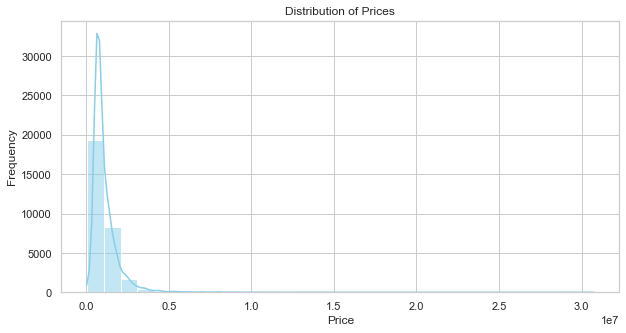

In [14]:
#Plotting a histogram to check the distribution of the price

# Set Seaborn style and plotting histogram
sns.set(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 5))
sns.histplot(data=kc_baseline['price'], kde=True, color='skyblue', bins=30)

# Add title and labels
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()


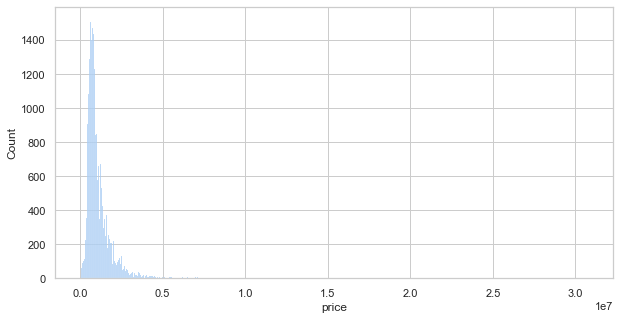

In [15]:
#Plotting a histogram to check the distribution of the price
plt.figure(figsize=(10,5))
sns.histplot(kc_baseline['price'])  
plt.show();

sns.set()

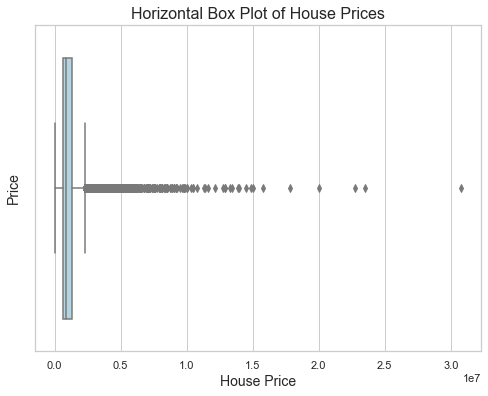

In [16]:
# Creating boxplot to assess for outliers 

sns.set(style="whitegrid")

# Create the horizontal box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=kc_baseline, x='price', color='lightblue', orient='h')

# Add title and axis labels
plt.title('Horizontal Box Plot of House Prices', fontsize=16)
plt.xlabel('House Price', fontsize=14)
plt.ylabel('Price', fontsize=14)


plt.show()

We can see by the histogram that price is slightly skewed to the right. This is more than likely due to a few homes with higher price values. Looking at the box plot, we can see that there are some homes with alot higher prices than the rest. We may need to eliminate and adjust for outliers. 

### Checking Distribution of Independent Variables 

In [18]:
# First checking back over statistics to look for any variables that may have potential outliers 
kc_baseline.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,Basement,Garage,...,Waterfront,Greenbelt,Nuisance,view_encoded,condition_encoded,heat_source_encoded,sewer_system_encoded,Month,Age,renovated
count,3.006200e+04,30062.000000,30062.000000,30062.000000,3.006200e+04,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,...,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000,30062.000000
mean,1.108769e+06,3.419899,2.338550,2114.614330,1.660457e+04,1.543044,7.655811,1811.144701,0.487991,0.669317,...,0.016832,0.025680,0.174340,0.293826,2.473022,1.542080,1.144468,6.875956,46.206540,0.045439
std,8.938315e+05,0.972436,0.885519,972.460457,5.951967e+04,0.566942,1.142833,877.234560,0.499864,0.470467,...,0.128643,0.158182,0.379408,0.852122,0.701702,0.850258,0.352798,3.112232,32.056445,0.208269
min,2.736000e+04,1.000000,1.000000,3.000000,4.020000e+02,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000
25%,6.495000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,7.000000,1180.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,4.000000,18.000000,0.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.478000e+03,1.500000,8.000000,1560.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,7.000000,44.000000,0.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056250e+04,2.000000,8.000000,2270.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,9.000000,68.000000,0.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,13.000000,12660.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,4.000000,6.000000,4.000000,12.000000,122.000000,1.000000


We will plot the feature variables to see their distributions utilizing both box plots and scatter plots. We do not need box plots for waterfront, greenbelt, nuisance, view_encoded, heat_source_encoded, condition encoded, sewer_system_encoded, renovated, sqft_basement, sqft_garage, and sqft_patio as these are binary variables.

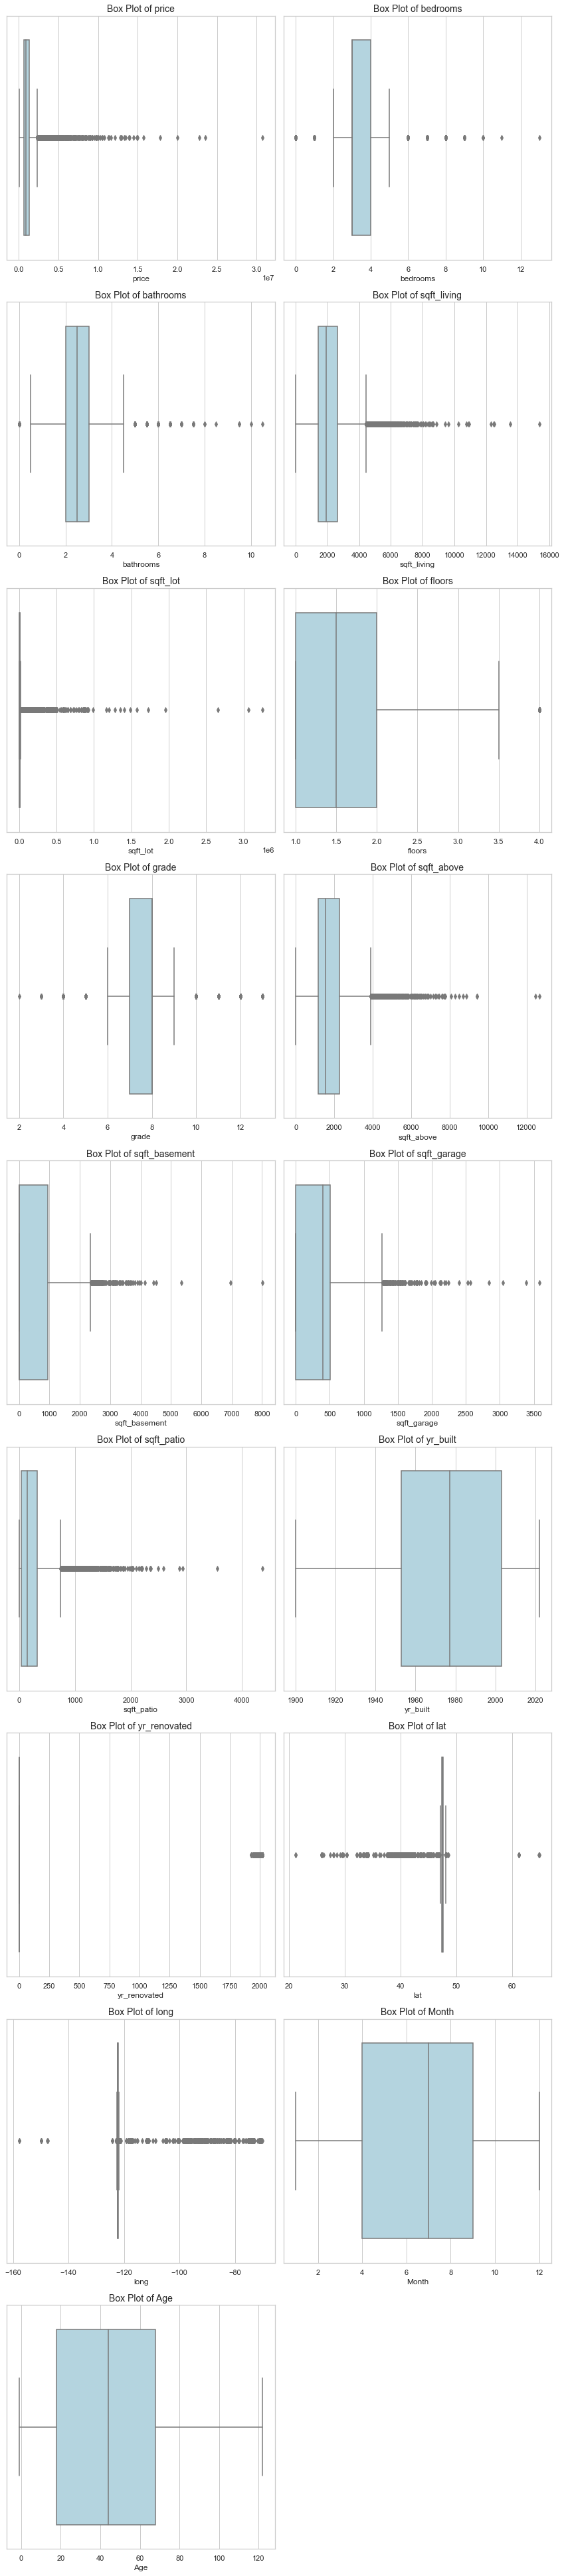

In [18]:
# creating separate df to contain columns for boxplots
kc_boxcol = kc_baseline.drop(['Waterfront', 'Greenbelt', 'Nuisance', 'view_encoded', 
                              'heat_source_encoded', 'condition_encoded', 'sewer_system_encoded', 'renovated'],
                             axis=1).copy()

sns.set(style="whitegrid")

# Determine the number of rows and columns for the subplots
num_rows = (len(kc_boxcol.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Loop through each column and create box plots
for i, column in enumerate(kc_boxcol.columns):
    sns.boxplot(x=kc_boxcol[column], ax=axes[i], color='lightblue')
    axes[i].set_title(f"Box Plot of {column}", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)

# Remove any extra subplots if necessary
for i in range(len(kc_boxcol.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [20]:
# pair plot for combining both scatter plots and box plots 
#add interpretations of plots 

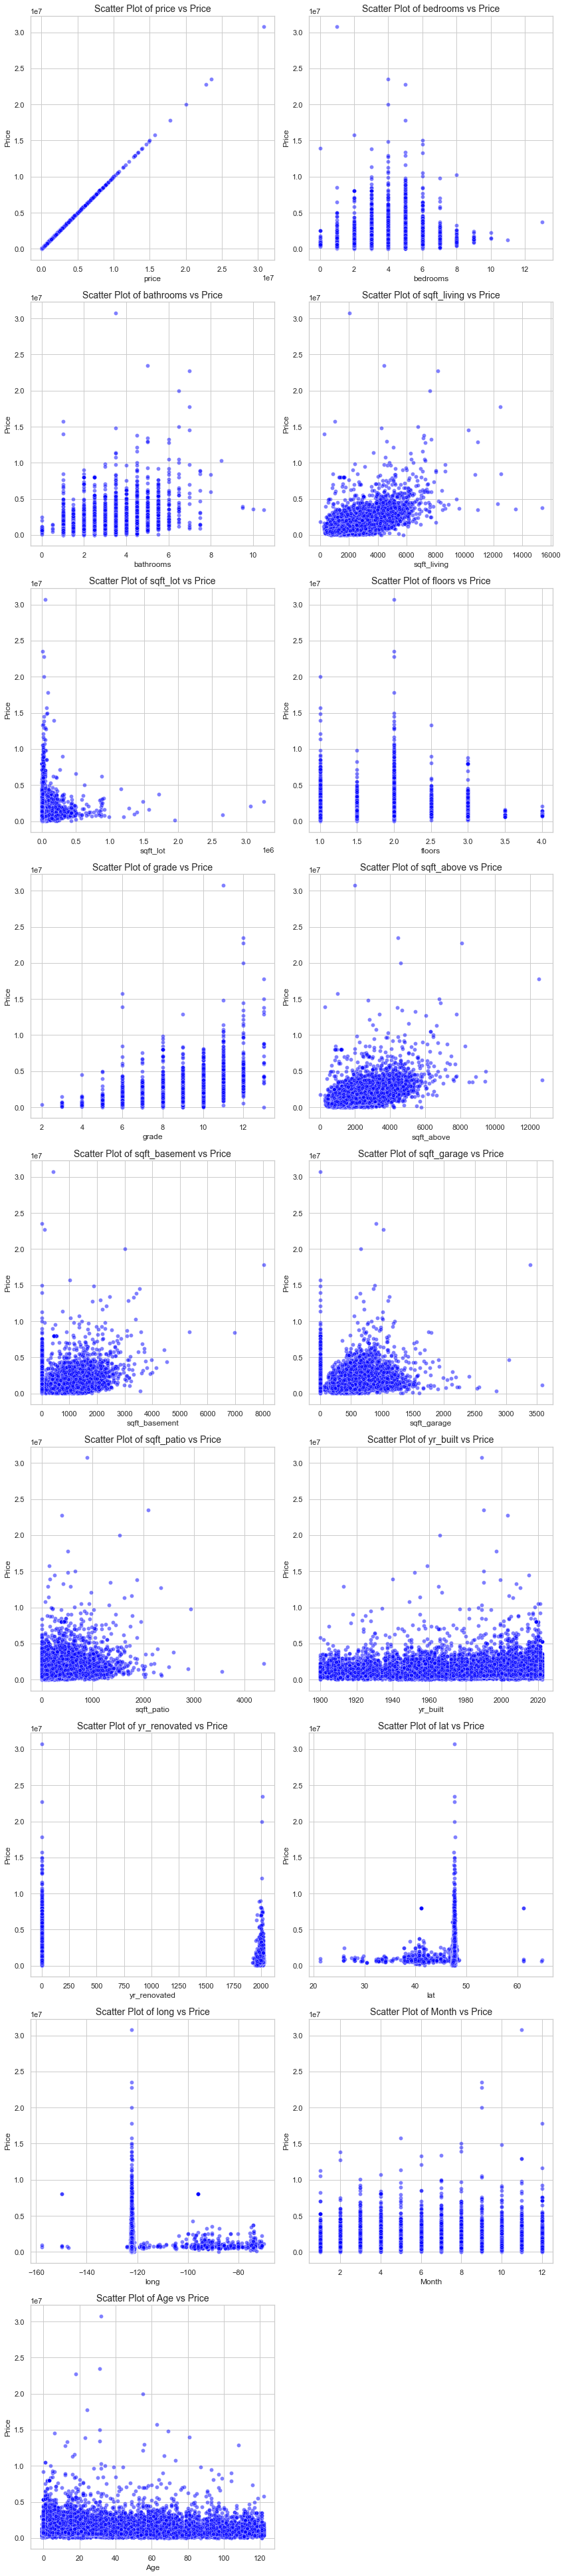

In [19]:
# Before adjust let's look at the scatter plots for the variables

# Set the style for the plot 
sns.set(style="whitegrid")

# Determine the number of rows and columns for the subplots
num_rows = (len(kc_boxcol.columns) + 1) // 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

# Flatten the axes array to easily iterate through the subplots
axes = axes.flatten()

# Loop through each column and create scatter plots
for i, column in enumerate(kc_boxcol.columns):
    sns.scatterplot(data=kc_boxcol, x=column, y='price', ax=axes[i], color='blue', alpha=0.5)
    axes[i].set_title(f"Scatter Plot of {column} vs Price", fontsize=14)
    axes[i].set_xlabel(column, fontsize=12)
    axes[i].set_ylabel('Price', fontsize=12)

# Remove any extra subplots if necessary
for i in range(len(kc_boxcol.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])


plt.tight_layout()
plt.show()

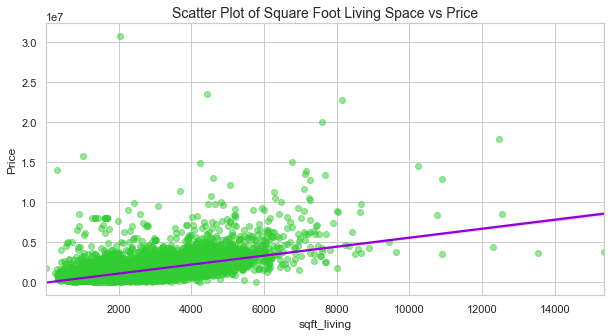

In [20]:
# Create a scatter plot with a regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
ax = sns.regplot(data=kc_boxcol, x='sqft_living', y='price', color='limegreen', 
                 scatter_kws={'alpha':0.5}, line_kws={'color': 'darkviolet'})

# Set title and labels
ax.set_title("Scatter Plot of Square Foot Living Space vs Price", fontsize=14)
ax.set_xlabel('sqft_living', fontsize=12)
ax.set_ylabel('Price', fontsize=12)


plt.show()



## Regression Practice

In [57]:
X_pract = kc_baseline.drop('price', axis=1)
y_pract = kc_baseline['price']
X_train, X_test, y_train, y_test = train_test_split(X_pract,y_pract, random_state=100)

In [59]:
from sklearn.dummy import DummyRegressor

baseline_pract = DummyRegressor()
baseline_pract.fit(X_train, y_train)
baseline_pract.score(X_test, y_test)

print("Our R-squared on the testing set is:", baseline_pract.score(X_test, y_test))

Our R-squared on the testing set is: -0.00016030077861728387


In [60]:
error = baseline_pract.predict(X_test)-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print('This is the RMSE:', sqr_mean_sqr_errors)

This is the RMSE: 915542.109206242


In [63]:
from statsmodels.formula.api import ols
formula_simple = 'price ~ sqft_living'
model_pract = ols(formula=formula_simple, data=kc_baseline).fit()
model_pract.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                 1.771e+04
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:04:49   Log-Likelihood:            -4.4845e+05
No. Observations:               30110   AIC:                         8.969e+05
Df Residuals:                   30108   BIC:                         8.969e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -7.554e+04   9798.938     -7.709      0.000   -9.47e+04   -5.63e+04
sqft_living   560.4787      4.212    133.083      0.000     552.224     568.733
==============================================================================
Omnibus:                    43384.896   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         47191364.764
Skew:                           8.195   Prob(JB):                         0.00
Kurtosis:                     196.252   Cond. No.                     5.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
x_simple= kc_baseline[['sqft_living']]
y_simple= kc_baseline['price']

x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, random_state=100)

lr=LinearRegression()
lr.fit(x_train_simple, y_train_simple)
print("Our R-squared on the testing set is:", lr.score(x_test_simple, y_test_simple))
print("Our R-squared on the training set is:", lr.score(x_train_simple, y_train_simple))

Our R-squared on the testing set is: 0.40326400933030593
Our R-squared on the training set is: 0.358519168938113


In [65]:
error = lr.predict(x_test_simple)-y_test_simple
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print('This is the RMSE:', sqr_mean_sqr_errors)

This is the RMSE: 707187.5948174727


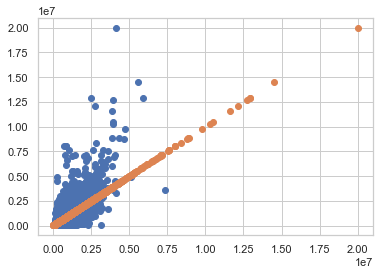

In [66]:
ypred = lr.predict(x_test_simple)
plt.scatter((ypred) , (y_test_simple))
plt.scatter((y_test_simple),(y_test_simple));

In [68]:
outcome = 'price'
predictors = kc_baseline.drop(['price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_baseline).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1274.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:06:51   Log-Likelihood:            -4.4486e+05
No. Observations:               30110   AIC:                         8.898e+05
Df Residuals:                   30085   BIC:                         8.900e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -5.082e+08   2.79e+07    -18.217      0.000   -5.63e+08   -4.54e+08
bedrooms              -1.07e+05   5153.212    -20.757      0.000   -1.17e+05   -9.69e+04
bathrooms             9.712e+04   7505.383     12.941      0.000    8.24e+04    1.12e+05
sqft_living            162.8878     17.244      9.446      0.000     129.090     196.686
sqft_lot                 0.2791      0.066      4.224      0.000       0.150       0.409
floors               -1.086e+05   9368.910    -11.590      0.000   -1.27e+05   -9.02e+04
grade                  2.57e+05   5405.538     47.538      0.000    2.46e+05    2.68e+05
sqft_above             267.7389     17.555     15.252      0.000     233.331     302.147
sqft_basement          109.7704     12.940      8.483      0.000      84.407     135.134
sqft_garage           -187.7619     18.088    -10.381      0.000    -223.215    -152.309
sqft_patio             144.4195     17.045      8.473      0.000     111.010     177.829
yr_built              2.505e+05   1.38e+04     18.157      0.000    2.23e+05    2.78e+05
yr_renovated          7671.1960    964.057      7.957      0.000    5781.604    9560.788
lat                   2.943e+04   3947.982      7.455      0.000    2.17e+04    3.72e+04
long                  9049.2010    995.671      9.089      0.000    7097.643     1.1e+04
Waterfront            1.045e+06   3.16e+04     33.134      0.000    9.84e+05    1.11e+06
Greenbelt             2.784e+04   2.34e+04      1.190      0.234    -1.8e+04    7.37e+04
Nuisance              7.081e+04   9799.368      7.226      0.000    5.16e+04       9e+04
view_encoded          6.653e+04   5083.429     13.087      0.000    5.66e+04    7.65e+04
condition_encoded     4.431e+04   5834.871      7.594      0.000    3.29e+04    5.57e+04
heat_source_encoded   1.387e+04   4631.971      2.995      0.003    4793.775     2.3e+04
sewer_system_encoded -2.283e+05   1.17e+04    -19.507      0.000   -2.51e+05   -2.05e+05
Month                 1.424e+04   2125.376      6.702      0.000    1.01e+04    1.84e+04
Age                   2.544e+05   1.38e+04     18.444      0.000    2.27e+05    2.81e+05
renovated            -1.529e+07   1.93e+06     -7.934      0.000   -1.91e+07   -1.15e+07
==============================================================================
Omnibus:                    43745.367   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55299454.421
Skew:                           8.277   Prob(JB):                         0.00
Kurtosis:                     212.294   Cond. No.                     4.77e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition

In [69]:
lr = LinearRegression()

lr.fit(X_train, y_train)
print("Our R-squared on the testing set is:", lr.score(X_test, y_test))
print("Our R-squared on the training set is:", lr.score(X_train, y_train))

Our R-squared on the testing set is: 0.5249362373987819
Our R-squared on the training set is: 0.4959920073440006


In [70]:
y_pred = lr.predict(X_test)
error=y_pred-y_test
sq_of_err=(error)**2
mean_sqr_of_errors=sq_of_err.mean()
print(mean_sqr_of_errors)
sqr_mean_sqr_errors= np.sqrt(mean_sqr_of_errors)
print(sqr_mean_sqr_errors)

398142867328.888
630985.6316342616


In [71]:
column_mean = kc_baseline['sqft_living'].mean()
column_std = kc_baseline['sqft_living'].std()

# Calculate values 2 standard deviations above and below the mean
value_below = column_mean - 2 * column_std
value_above = column_mean + 2 * column_std

print(f"Mean: {column_mean:.2f}")
print(f"Standard Deviation: {column_std:.2f}")
print(f"Value 2 SDs below the mean: {value_below:.2f}")
print(f"Value 2 SDs above the mean: {value_above:.2f}")


Mean: 2113.30
Standard Deviation: 973.44
Value 2 SDs below the mean: 166.42
Value 2 SDs above the mean: 4060.17


In [73]:
column_mean2 = kc_baseline['bedrooms'].mean()
column_std2 = kc_baseline['bedrooms'].std()

# Calculate values 2 standard deviations above and below the mean
value_below2 = column_mean2 - 2 * column_std2
value_above2 = column_mean2 + 2 * column_std2

print(f"Mean: {column_mean2:.2f}")
print(f"Standard Deviation: {column_std2:.2f}")
print(f"Value 2 SDs below the mean: {value_below2:.2f}")
print(f"Value 2 SDs above the mean: {value_above2:.2f}")

Mean: 3.42
Standard Deviation: 0.98
Value 2 SDs below the mean: 1.46
Value 2 SDs above the mean: 5.37


In [76]:
print("Our data before removing outliers: ", kc_baseline['bedrooms'].describe())
print("Our data before removing outliers: ", kc_baseline['sqft_living'].describe())

kc_baseline = kc_baseline[kc_baseline['bedrooms'] < 5.37]
kc_baseline = kc_baseline[kc_baseline['bedrooms'] > 1.46]


kc_baseline = kc_baseline[kc_baseline['sqft_living'] < 4060.17]
kc_baseline = kc_baseline[kc_baseline['sqft_living'] > 166.42]
print("Our data after removing outliers: ", kc_baseline['bedrooms'].describe())
print("Our data after removing outliers: ", kc_baseline['sqft_living'].describe())

Our data before removing outliers:  count    30110.000000
mean         3.415211
std          0.979769
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64
Our data before removing outliers:  count    30110.000000
mean      2113.296745
std        973.436623
min          3.000000
25%       1420.000000
50%       1920.000000
75%       2620.000000
max      15360.000000
Name: sqft_living, dtype: float64
Our data after removing outliers:  count    28013.000000
mean         3.349873
std          0.819709
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: bedrooms, dtype: float64
Our data after removing outliers:  count    28013.000000
mean      1995.882233
std        752.915628
min        510.000000
25%       1410.000000
50%       1880.000000
75%       2490.000000
max       4060.000000
Name: sqft_living, dtype: float64


In [79]:
# Setting up variables for model 

y_price = kc_baseline["price"]

X_baseline = kc_baseline.drop(['price'], axis=1) 

# The Independent variable X_baseline is a dataframe that has eliminated the target variable 'price' 

In [80]:
# Running baseline model and getting the summary
baseline_model= sm.OLS(y_price, sm.add_constant(X_baseline))
baseline = baseline_model.fit()

print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     869.5
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:22:19   Log-Likelihood:            -4.0614e+05
No. Observations:               28013   AIC:                         8.123e+05
Df Residuals:                   27988   BIC:                         8.125e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.683e+08 

## Linear Regression

### Baseline Model 

The first baseline model to be ran with include almost of the characteristic variables. 

In [21]:
# Setting up variables for model 

y_price = kc_baseline["price"]

X_baseline = kc_baseline.drop(['price'], axis=1) 

# The Independent variable X_baseline is a dataframe that has eliminated the target variable 'price' 

Running Baseline Model 

In [22]:
# Running baseline model and getting the summary
baseline_model= sm.OLS(y_price, sm.add_constant(X_baseline))
baseline = baseline_model.fit()

print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     1274.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:36:45   Log-Likelihood:            -4.4486e+05
No. Observations:               30110   AIC:                         8.898e+05
Df Residuals:                   30085   BIC:                         8.900e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.082e+08 

Checking for RMSE and MAE using SKlearn

In [23]:
# use fitted model to generate predictions for y
y_preds1 = baseline.predict(sm.add_constant(X_baseline))


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_price, y_preds1))
print(mean_squared_error(y_price, y_preds1, squared=False))

347786.099066695
631373.8346612424


### Baseline Model Interpretation

- With our baseline model, the R-squared value is 0.503, suggesting that approximately 50.3% of the variance in the "price" variable can be explained by the independent variables in the model. The F-statistic is 1451, and the associated p-value (Prob (F-statistic)) is very close to zero (0.00) which indicates that the model is statistically significant and performs better than a model with no predictors. 
- Given the model, if all variables are set to 0, the price of a home would be -509,200,000 USD. 
- Looking specifically at Sqft_living, for every increase of 1 sqft of living space in a home, the average price increases by 262.52 USD. 
- Looking at overall condition, if condition rating improves by 1 categories/ levels up one rating on overall condition, there is an average increase of 40,870 USD. 
- Looking at our independent variables we see that all are significant at an alpha level of 0.05 except for Greenbelt. 
- Our baseline model has quite high error metrics with an MAE of 347,924.95 and RMSE of 629,811.36.

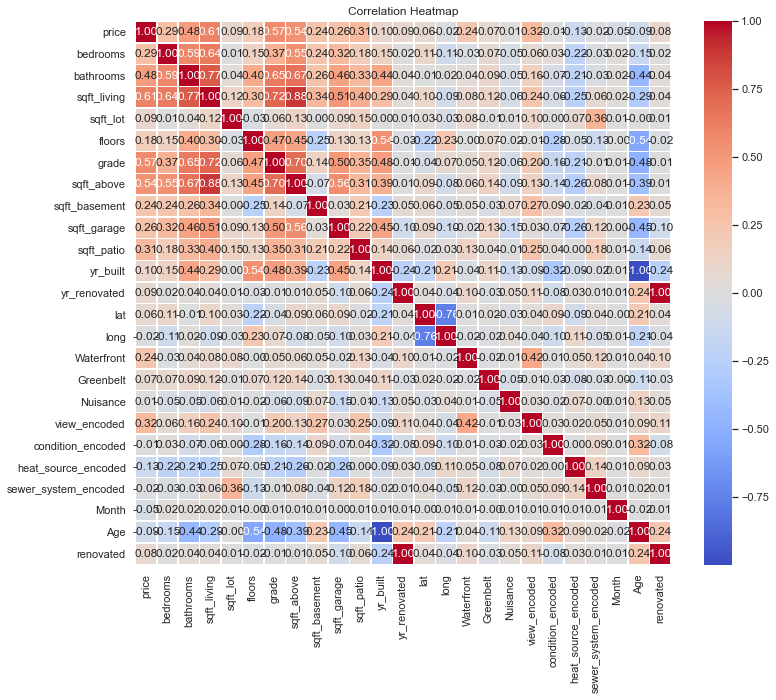

In [25]:
# Calculate the correlation matrix
correlation_matrix = kc_baseline.corr()

# Set up the heatmap figure
plt.figure(figsize=(12, 10))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title and show the plot
plt.title("Correlation Heatmap")
plt.show()

In [26]:
df=kc_baseline.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"

df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs

df.set_index(['pairs'], inplace = True)

#drop level columns

df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0

df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.

df.drop_duplicates(inplace=True)



In [56]:
#Checking for variables with high multicolinearity of > 0.75
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(renovated, yr_renovated)",0.999958
"(yr_built, Age)",0.999888
"(sqft_living, sqft_above)",0.883732
"(bathrooms, sqft_living)",0.772209
"(long, lat)",0.760532


To prep for next model iteraion I will be dropping columns yr_built, sqft_above and bathrooms due to higher multicollinearity with Age and sqft_living. Kept sqft_living due to it being variable with highest correlation with price. Also dropping Greenbelt due to high p-value.

In [41]:
#Dropping columns to prep data for second model
kc_baseline2 = kc_baseline.drop(['sqft_above', "bathrooms", "yr_built", 'yr_renovated', "Greenbelt"], axis=1)

### Model 2

This model builds off of Model 1 in that we are using most of the feature variables but have dropped the variables sqft_above, bathrooms and yr_built due to factors of multicollinearity and dropped Greenbelt due to non- significant (at alpha of 0.05) P-value. 

In [42]:
# Setting up variables for model 

y_price2 = kc_baseline2["price"]

X_baseline2 = kc_baseline2.drop(['price'], axis=1) 


# The Independent variable X_baseline2 is a dataframe that has eliminated the target variable 'price' 

In [43]:
# Running Second model iteration and getting the summary
baseline_model2= sm.OLS(y_price2, sm.add_constant(X_baseline2))
baseline2 = baseline_model2.fit()

print(baseline2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     1720.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:53:02   Log-Likelihood:            -4.4439e+05
No. Observations:               30062   AIC:                         8.888e+05
Df Residuals:                   30044   BIC:                         8.890e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.376e+06 

In [44]:
y_preds2 = baseline2.predict(sm.add_constant(X_baseline2))
# use fitted model to generate predictions for y
print(f"MAE for model 2: {mean_absolute_error(y_price2, y_preds2)}")
print(f"RSME for model 2: {mean_squared_error(y_price2, y_preds2, squared=False)}")

MAE for model 2: 351212.50904686836
RSME for model 2: 636340.5664993646


### Model 2 Interpretation


- With our second model, the R-squared value is 0.493, suggesting that approximately 49.3% of the variance in the "price" variable can be explained by the independent variables in the model. The F-statistic is 1720, and the associated p-value (Prob (F-statistic)) is very close to zero (0.00) which indicates that the model is statistically significant and performs better than a model with no predictors. This model was barely lower than our initial model in terms of performance with its R-squared value being .01 lower than our baseline model. 
- Given the model, if all variables are set to 0, the price of a home would be -1,376,000 USD.
- Looking specifically at Sqft_living, for every increase of 1 sqft of living space in a home, the average price increases by ~431.98 USD.
- Looking at overall condition, if condition rating improves by 1 categories/ levels up one rating on overall condition, there is an average increase of 36,510 USD.
- Our baseline model has quite high error metrics with an MAE of 351,212.51 and RMSE of 636,340.57.

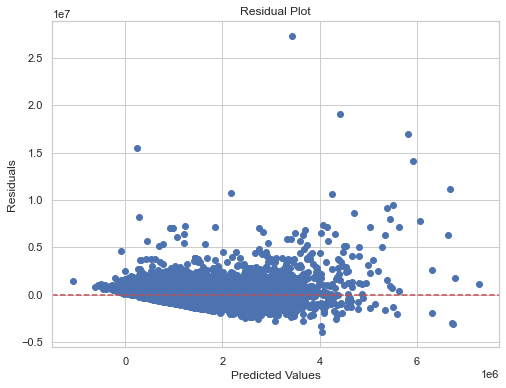

In [45]:
#plotting residuals to check for assumption of homoscedasticity
#residuals = baseline2.resid

residuals = y_price2 - y_preds2 
plt.figure(figsize=(8, 6))
plt.scatter(y_preds2 , residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()


Looking at the residuals of the second model, we do see some indications of heteroscedasticity within our model indicating it may not be the best fit for our data. 

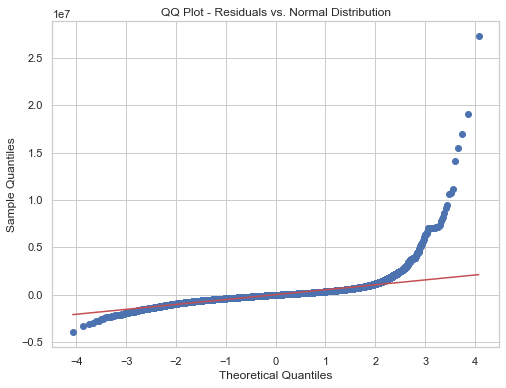

In [46]:
# Creating an additional QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, plot=plt)
plt.title("QQ Plot - Residuals vs. Normal Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


Noting that the residuals deviate from the line indicates that we have deviations in normality in our residuals and suggests that our residuals are not normally distributed. To adjust and potentially improve the model we should consider applying transformations to our data.  

### Model 3

In [36]:
#Dropping sqft_basement due to not being significant in last model
kc_baseline3 = kc_baseline2.drop(['Basement'], axis=1) 

In [37]:
# Applying log tranformations to our target variable of price to see

y_pricelog = np.log(kc_baseline3["price"])

X_baseline3 = kc_baseline3.drop(['price'], axis=1) 

log_model= sm.OLS(y_pricelog, sm.add_constant(X_baseline3))
price_log_model = log_model.fit()

print(price_log_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     1834.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:43:45   Log-Likelihood:                -15670.
No. Observations:               30062   AIC:                         3.138e+04
Df Residuals:                   30044   BIC:                         3.153e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -367.0553 

In [38]:
y_logpreds = price_log_model.predict(sm.add_constant(X_baseline3))
# use fitted model to generate predictions for y
print(f"MAE for model 2: {mean_absolute_error(y_pricelog, y_logpreds)}")
print(f"RSME for model 2: {mean_squared_error(y_pricelog, y_logpreds, squared=False)}")

MAE for model 2: 0.2861622895923305
RSME for model 2: 0.4075176399234191


In [39]:
# Given coefficients in the log-transformed linear regression model
const_coeff_log = -367.0553
sqft_living_coeff_log = 0.0002
condition_encoded_coeff_log = 0.0511

# Inverse log the "const" coefficient to obtain the intercept in the original scale
const_coeff_original = np.exp(const_coeff_log)

# Inverse log the "sqft_living" coefficient to obtain the expected percentage change in price
sqft_living_coeff_percentage_change = np.exp(sqft_living_coeff_log) - 1

# Inverse log the "condition_encoded" coefficient to obtain the expected percentage change in price
condition_encoded_coeff_percentage_change = np.exp(condition_encoded_coeff_log) - 1

print("Intercept in the original scale:", const_coeff_original)
print("Percentage change in price per one-unit increase in sqft_living:", sqft_living_coeff_percentage_change)
print("Percentage change in price per one-unit increase in view_encoded:", condition_encoded_coeff_percentage_change)


Intercept in the original scale: 3.889633273599493e-160
Percentage change in price per one-unit increase in sqft_living: 0.00020002000133345632
Percentage change in price per one-unit increase in view_encoded: 0.052428130834322184


### Model 3 Interpretation


- With our third model, the R-squared value is 0.509, suggesting that approximately 50.9% of the variance in the "price" variable can be explained by the independent variables in the model. The F-statistic is 1834, and the associated p-value (Prob (F-statistic)) is very close to zero (0.00) which indicates that the model is statistically significant and performs better than a model with no predictors. This model was barely higher than our initial model in terms of performance with its R-squared value being .006 higher than our baseline model. 

- Given the model, if all variables are set to 0, the price of a home would be ___ USD.
- Looking specifically at Sqft_living, for every increase of 1 sqft of living space in a home, the average price increases by 0.02% (0.0002).
- Looking at overall condition, if condition rating improves by 1 (unit) categories/ levels up one rating on overall condition, there is roughly 5.2% (0.052).
- Our log transformed model has an MAE of 349,198.13 and RMSE of 632,924.34.


In [40]:
# look over results from model 3

### Model 4 

Building based on highest correlated factor of Sqft_living 

In [57]:
# Setting up variables for model 

y_baseprice = kc_baseline2["price"]

X_sqft = kc_baseline2['sqft_living']

# Running baseline model and getting the summary
baseline_sqft_model= sm.OLS(y_baseprice, sm.add_constant(X_sqft))
baseline_sqft = baseline_sqft_model.fit()

print(baseline_sqft.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 1.800e+04
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:10:00   Log-Likelihood:            -4.4755e+05
No. Observations:               30062   AIC:                         8.951e+05
Df Residuals:                   30060   BIC:                         8.951e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8.076e+04   9758.256     -8.276      

In [ ]:
# use fitted model to generate predictions for y
y_preds_sqft = baseline_sqft.predict(sm.add_constant(X_sqft))
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_baseprice, y_preds_sqft))
print(mean_squared_error(y_baseprice, y_preds_sqft, squared=False))

In [69]:
# Running model with both 'grade' and 'sqft-living'

y_baseprice = kc_baseline2["price"]

X_grade = kc_baseline2[['sqft_living','grade']]

# Running baseline model and getting the summary
baseline_grade_model= sm.OLS(y_baseprice, sm.add_constant(X_grade))
baseline_grade = baseline_grade_model.fit()

print(baseline_grade.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:19:52   Log-Likelihood:            -4.4670e+05
No. Observations:               30062   AIC:                         8.934e+05
Df Residuals:                   30059   BIC:                         8.934e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.306e+06   3.09e+04    -42.312      

In [59]:
# Adding 'grade' to model along with sqft-living

y_baseprice = kc_baseline2["price"]

X_sqft = kc_baseline2[['sqft_living','grade']]

# Running baseline model and getting the summary
baseline_sqft_model= sm.OLS(y_baseprice, sm.add_constant(X_sqft))
baseline_sqft = baseline_sqft_model.fit()

print(baseline_sqft.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        09:12:10   Log-Likelihood:            -4.4670e+05
No. Observations:               30062   AIC:                         8.934e+05
Df Residuals:                   30059   BIC:                         8.934e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.306e+06   3.09e+04    -42.312      

## Regression Results 

## Conclusion/ Recommendations

## Limitations

In [132]:
kc_test = kc_baseline.drop(columns = 'yr_built').copy()

In [134]:
# Generating correlations between the independent variables and the target variable
kc_test.corr()["price"].sort_values(ascending= False)

price                   1.000000
sqft_living             0.612011
grade                   0.569784
sqft_above              0.541596
bathrooms               0.483939
view_encoded            0.316326
bedrooms                0.293157
Waterfront              0.233624
floors                  0.182296
Patio                   0.149270
Garage                  0.109704
Basement                0.103824
sqft_lot                0.085546
renovated               0.085409
Greenbelt               0.068233
Nuisance                0.012340
condition_encoded      -0.010997
sewer_system_encoded   -0.021097
Month                  -0.053366
Age                    -0.095548
heat_source_encoded    -0.131784
Name: price, dtype: float64

In [135]:
kc_test.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,Basement,Garage,...,Waterfront,Greenbelt,Nuisance,view_encoded,condition_encoded,heat_source_encoded,sewer_system_encoded,Month,Age,renovated
price,1.000000,0.293157,0.483939,0.612011,0.085546,0.182296,0.569784,0.541596,0.103824,0.109704,...,0.233624,0.068233,0.012340,0.316326,-0.010997,-0.131784,-0.021097,-0.053366,-0.095548,0.085409
bedrooms,0.293157,1.000000,0.585628,0.638797,0.009029,0.151037,0.370683,0.548172,0.066799,0.237130,...,-0.027780,0.065060,-0.050734,0.058252,0.030959,-0.216200,-0.033416,0.021080,-0.147865,0.015344
bathrooms,0.483939,0.585628,1.000000,0.774361,0.039148,0.409605,0.648154,0.676630,0.123136,0.336805,...,0.046488,0.093722,-0.050085,0.159043,-0.069419,-0.207238,-0.033576,0.024527,-0.446958,0.040952
sqft_living,0.612011,0.638797,0.774361,1.000000,0.124693,0.304614,0.721791,0.883590,0.090237,0.300650,...,0.083513,0.116018,-0.059896,0.246051,-0.056221,-0.246828,0.062052,0.017142,-0.292301,0.039252
sqft_lot,0.085546,0.009029,0.039148,0.124693,1.000000,-0.030615,0.059427,0.134117,-0.044826,-0.012888,...,0.079850,-0.012684,0.013167,0.094561,0.001580,0.067729,0.360157,0.009773,-0.002733,0.009731
floors,0.182296,0.151037,0.409605,0.304614,-0.030615,1.000000,0.466233,0.448511,-0.171258,0.100635,...,-0.003321,0.065570,-0.016330,-0.006212,-0.283183,-0.051650,-0.131213,0.000132,-0.544174,-0.024595
grade,0.569784,0.370683,0.648154,0.721791,0.059427,0.466233,1.000000,0.702882,0.025520,0.337097,...,0.051173,0.120110,-0.061001,0.205477,-0.159691,-0.212223,-0.012227,0.006982,-0.482037,-0.011578
sqft_above,0.541596,0.548172,0.676630,0.883590,0.134117,0.448511,0.702882,1.000000,-0.256104,0.337205,...,0.060439,0.135438,-0.094103,0.135254,-0.138526,-0.259413,0.082332,0.009908,-0.387765,0.011384
Basement,0.103824,0.066799,0.123136,0.090237,-0.044826,-0.171258,0.025520,-0.256104,1.000000,-0.093059,...,0.015042,-0.052055,0.109002,0.183811,0.057071,0.033240,-0.107587,0.010087,0.248494,0.054130
Garage,0.109704,0.237130,0.336805,0.300650,-0.012888,0.100635,0.337097,0.337205,-0.093059,1.000000,...,-0.059732,0.102045,-0.139566,-0.029878,-0.067481,-0.253738,-0.006181,-0.000934,-0.443104,-0.115528


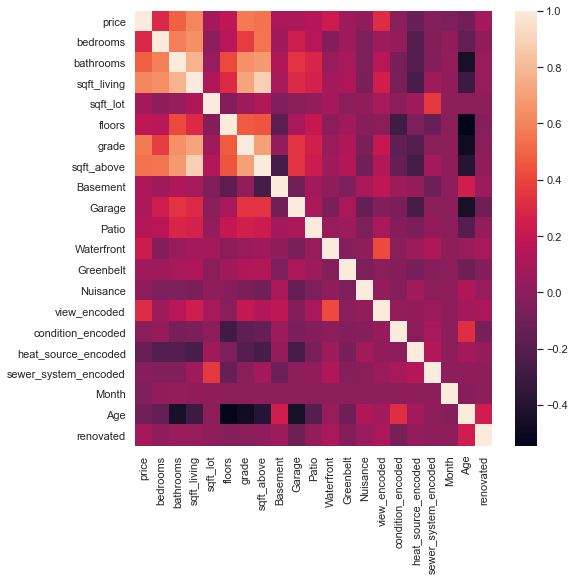

In [136]:
sns.set()
sns.set(rc={'figure.figsize':(8, 8)})

# Use the .heatmap method to depict the relationships visually!
sns.heatmap(kc_test.corr());

In [137]:
price_corrs = kc_test.corr()['price'].map(abs).sort_values(ascending=False)
price_corrs

price                   1.000000
sqft_living             0.612011
grade                   0.569784
sqft_above              0.541596
bathrooms               0.483939
view_encoded            0.316326
bedrooms                0.293157
Waterfront              0.233624
floors                  0.182296
Patio                   0.149270
heat_source_encoded     0.131784
Garage                  0.109704
Basement                0.103824
Age                     0.095548
sqft_lot                0.085546
renovated               0.085409
Greenbelt               0.068233
Month                   0.053366
sewer_system_encoded    0.021097
Nuisance                0.012340
condition_encoded       0.010997
Name: price, dtype: float64

In [138]:
kc_test_preds = kc_test[['sqft_living', 'grade']]
kc_test_target = kc_test['price']

In [139]:
lr = LinearRegression()

In [140]:
lr.fit(kc_test_preds, kc_test_target)

LinearRegression()

In [141]:
lr.score(kc_test_preds, kc_test_target)

0.40878213871355007

In [142]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)

In [143]:
ss = StandardScaler()
ss.fit(kc_test.drop('price', axis=1))

kc_test_scaled = ss.transform(kc_test.drop('price', axis=1))

In [144]:
select.fit(X=kc_test_scaled, y=kc_test['price'])

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [145]:
# Tells me the indices of the columns that are the best 
select.support_

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False])

In [146]:
kc_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30062 entries, 0 to 30154
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 30062 non-null  float64
 1   bedrooms              30062 non-null  int64  
 2   bathrooms             30062 non-null  float64
 3   sqft_living           30062 non-null  int64  
 4   sqft_lot              30062 non-null  int64  
 5   floors                30062 non-null  float64
 6   grade                 30062 non-null  int64  
 7   sqft_above            30062 non-null  int64  
 8   Basement              30062 non-null  int64  
 9   Garage                30062 non-null  int64  
 10  Patio                 30062 non-null  int64  
 11  Waterfront            30062 non-null  uint8  
 12  Greenbelt             30062 non-null  uint8  
 13  Nuisance              30062 non-null  uint8  
 14  view_encoded          30062 non-null  int64  
 15  condition_encoded  

In [147]:
kc_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,Basement,Garage,...,Waterfront,Greenbelt,Nuisance,view_encoded,condition_encoded,heat_source_encoded,sewer_system_encoded,Month,Age,renovated
0,675000.0,4,1.0,1180,7140,1.0,7,1180,0,0,...,0,0,0,0,3,1,1,5,53,0
1,920000.0,5,2.5,2770,6703,1.0,7,1570,1,0,...,0,0,1,2,2,2,1,12,71,0
2,311000.0,6,2.0,2880,6156,1.0,7,1580,1,0,...,0,0,0,2,2,1,1,9,65,0
3,775000.0,3,3.0,2160,1400,2.0,9,1090,1,1,...,0,0,0,2,2,1,1,12,11,0
4,592500.0,2,2.0,1120,758,2.0,7,1120,1,1,...,0,0,1,0,2,3,1,8,9,0


In [ ]:
# sqft_living, age and yr_built

In [148]:
select.ranking_

array([ 3,  4,  1, 15,  9,  1,  7, 13, 10, 14,  2, 18, 11,  6, 12, 16,  5,
        8,  1, 17])

In [149]:
y_sstest = kc_test["price"]

X_sstest = kc_test[['sqft_living','grade', 'Age']]

# Running baseline model and getting the summary
baseline_ss_model= sm.OLS(y_sstest, sm.add_constant(X_sstest))
baseline_ss = baseline_ss_model.fit()

print(baseline_ss.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     7894.
Date:                Mon, 07 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:13:04   Log-Likelihood:            -4.4587e+05
No. Observations:               30062   AIC:                         8.917e+05
Df Residuals:                   30058   BIC:                         8.918e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.217e+06   3.72e+04    -59.557      